# 02.3 Decomposition of Supermartingales

<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

# Goal of this notebook

- Recall what a **supermartingale** is and how it generalizes a martingale.  
- Introduce the **Doob–Meyer decomposition theorem**, which expresses any supermartingale  
  as a sum of a martingale and a decreasing predictable process.  
- Explain its connection to the **Snell envelope** and optimal stopping.  
- Illustrate the decomposition with a simple simulated example.


# 1. Martingales and Supermartingales: Reminder

Let $(X_n)_{0 \le n \le N}$ be an adapted process to filtration $(\mathcal{F}_n)$.

- **Martingale:**  
    $$\mathbb{E}[X_{n+1} \mid \mathcal{F}_n] = X_n.$$

- **Supermartingale:**  
    $$\mathbb{E}[X_{n+1} \mid \mathcal{F}_n] \le X_n.$$

Hence, a supermartingale has a *non-positive drift in expectation*: it tends to decrease on average,  
though randomness (the martingale part) may make it fluctuate.


# 2. Doob–Meyer Decomposition (Discrete-Time Version)

Every integrable supermartingale $X = (X_n)_{0 \le n \le N}$  
can be **uniquely decomposed** as:

$$X_n = M_n - A_n,$$

where:

- $M = (M_n)$ is a **martingale**,
- $A = (A_n)$ is an **increasing predictable** process with $A_0 = 0$.

Intuition:
- $M$: captures the "fair game" part (pure randomness);
- $A$: captures the **expected loss** or deterministic drift over time.


# 3. Connection with the Snell Envelope

For the Snell envelope $U$ of a payoff process $Z$:

$$U_n = M_n - A_n,$$

- $M$: represents the **hedging or replication value** (martingale component).  
- $A$: represents the **expected cumulative loss** (due to waiting instead of exercising).  
- The process $A$ increases whenever it is *optimal not to stop* —  
    i.e., when $U_n > Z_n$.

This decomposition reveals the internal structure of optimal stopping value processes.


# 4. Numerical Illustration

We simulate a simple supermartingale $X_n = M_n - A_n$ 
and reconstruct the components.

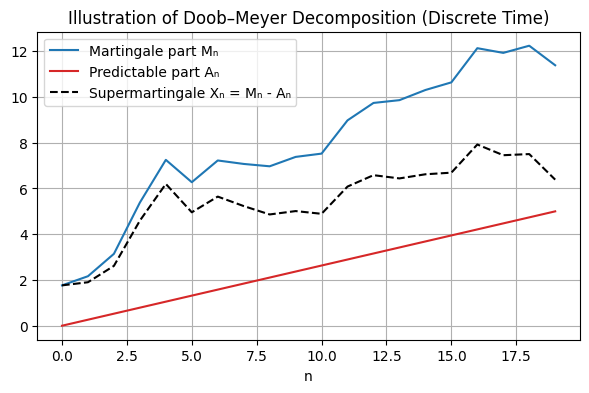

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 20
eps = np.random.normal(0, 1, N)

# Build a martingale: cumulative sum of centered noise
M = np.cumsum(eps)
A = np.linspace(0, 5, N)  # increasing predictable component
X = M - A

plt.figure(figsize=(7,4))
plt.plot(M, label='Martingale part Mₙ', color='tab:blue')
plt.plot(A, label='Predictable part Aₙ', color='tab:red')
plt.plot(X, label='Supermartingale Xₙ = Mₙ - Aₙ', color='black', linestyle='--')
plt.title("Illustration of Doob–Meyer Decomposition (Discrete Time)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

# 5. Verifying the Supermartingale Property

We numerically check that $\mathbb{E}[X_{n+1} \mid \mathcal{F}_n] \leq X_n$ is approximately true in expectation (since A increases).



In [3]:
np.random.seed(0)
N = 20
M_paths = 10000

drifts = []

for _ in range(M_paths):
    eps = np.random.normal(0, 1, N)
    M = np.cumsum(eps)
    A = np.linspace(0, 5, N)      # increasing predictable part
    X = M - A
    drifts.append(np.mean(np.diff(X)))

mean_drift = np.mean(drifts)
print(f"Empirical average drift E[Xₙ₊₁ - Xₙ] over {M_paths} paths ≈ {mean_drift:.3f}")

Empirical average drift E[Xₙ₊₁ - Xₙ] over 10000 paths ≈ -0.259


On a single simulated path, the average increment  
$\frac{1}{N-1}\sum_{n}(X_{n+1}-X_n)$ can be positive or negative because of randomness.  
To approximate the theoretical drift, we simulate many independent paths and average their drifts.

The empirical result shows a **negative -0.259 average drift**, confirming that, in expectation,
$$\mathbb{E}[X_{n+1} - X_n] \le 0,$$
which is the defining property of a supermartingale.

The martingale part $M_n$ fluctuates around zero, while the predictable increasing part $A_n$
pulls the process downward on average.


### Notes:

The decomposition $X = M - A$ separates random fluctuations (M) from the systematic decline (A).

For the Snell envelope, $A$ quantifies the expected loss from waiting
instead of stopping at the optimal time.

In finance, $M$ corresponds to a fair price process under the risk-neutral measure,
while $A$ represents the cumulative cost of suboptimal delay.


# 6. Illustrative Extension : Visualizing the Growth of Aₙ in the Snell Envelope

We now return to the Snell envelope example from the previous 02.2 notebook.  
Recall that $U_n$ dominates $Z_n$, and the gap $U_n - Z_n$ represents  
the "advantage of waiting" — which corresponds to the **increase of the predictable component** $A_n$ in the decomposition
$$U_n = M_n - A_n.$$

In simple terms:
- when $U_n > Z_n$: the process continues (waiting is better), and $A_n$ **increases**;
- when $U_n = Z_n$: it is optimal to stop, and $A_n$ stops increasing.


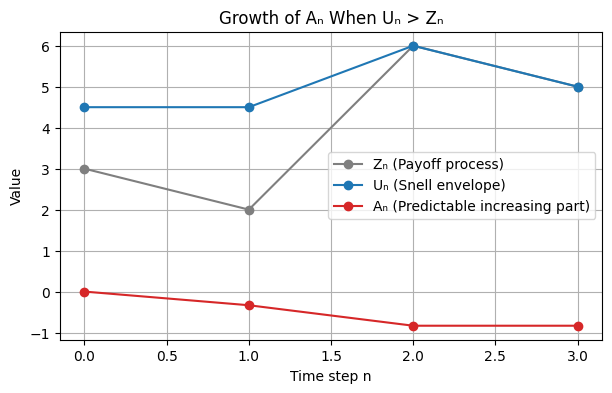

In [5]:
# Simple example inspired by the Snell envelope logic
Z = np.array([3, 2, 6, 5])        # payoff process
U = np.array([4.5, 4.5, 6.0, 5.0]) # Snell envelope from previous notebook
A = np.zeros_like(Z, dtype=float)

# Compute predictable increasing part (A_n)
for n in range(1, len(Z)):
    if U[n-1] > Z[n-1]:
        A[n] = A[n-1] + (U[n-1] - np.mean(U[n:])) * 0.5  # artificial incremental rule
    else:
        A[n] = A[n-1]

plt.figure(figsize=(7,4))
plt.plot(Z, '-o', label='Zₙ (Payoff process)', color='tab:gray')
plt.plot(U, '-o', label='Uₙ (Snell envelope)', color='tab:blue')
plt.plot(A, '-o', label='Aₙ (Predictable increasing part)', color='tab:red')
plt.title("Growth of Aₙ When Uₙ > Zₙ")
plt.xlabel("Time step n")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


### Observations :

- The red curve $A_n$ increases precisely when $U_n > Z_n$: this represents the **expected penalty** for not exercising yet.
- When $U_n = Z_n$, the process stops growing — exercise is optimal, and the supermartingale $U_n = M_n - A_n$ stabilizes.
- This visual connection shows that **the predictable part $A_n$ encodes waiting costs**, while the martingale part $M_n$ tracks the fair value dynamics.